Foundations of AI : Lab-6 : Adaptive A* Search

Name: Gaurav Pendharkar

Registration No.: 20BAI1153

# Problem Statement

While travelling through the roadways there are different types of factors which have to be taken into consideration as following:
1. Distance needed to be covered.
2. Facilities
   - Emergency Facilities (eg. Garages, petrol pumps, etc)
   - Non-essential facilities (eg. nearby restaurants, hotels,etc).
Here, an A* star search is used to find the best possible route with all the factors taken into consideration.

<center>F(x) = D(x) + A(x)</center>

<u>where:</u>

D(x) will be the cost for each edge (i.e. distance)

A(x) will be the heuristics which will resemble the facilities.

Since, we are considering facilities it means that more the facilities better the route. Hence, higher heuristic function value better is the route.  

<ins>Modification:<ins>
 
    In reality, on a particular day some of facilities may not be functioning or may not be functioning permanently.
    Eg. There was Petrol pump on a route last month but its not there this month.
 
 Hence, we aim to use Adaptive A* Search to accustom to the changes with respect to time in the facilities (i.e. environment)

# Importing the required modules

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random as r
from itertools import combinations
import pandas as pd
import numpy as np
from tabulate import tabulate
import math as m

# Route Generator

In [4]:
# Generates the route for A* Search (Randomly)
class RouteGenerator:
    def __init__(self):
      self.n = 15
      self.graph = pd.DataFrame(columns=["Source","Destination","Distance"])
      self.g = nx.Graph()
    def generateRoute(self):
      possible_travels = list(combinations([i for i in range(1,self.n + 1)],2))
      for i in r.sample(possible_travels,20):
          self.graph = self.graph.append({"Source":i[0],"Destination":i[1],"Distance":r.randint(40,200)},ignore_index=True)
    def displayRoute(self):
      plt.figure(figsize=(20,20))
      for rowIndex in range(len(self.graph)):
          self.g.add_edge(self.graph.iloc[rowIndex]["Source"],self.graph.iloc[rowIndex]["Destination"],weight=self.graph.iloc[rowIndex]["Distance"])
      pos = nx.circular_layout(self.g,scale=5)
      nx.draw_networkx_nodes(self.g, pos=pos,node_size=1100)
      nx.draw_networkx_edges(self.g, pos=pos)
      nx.draw_networkx_labels(self.g, pos, font_size=15,font_color='w')
      nx.draw_networkx_edge_labels(self.g,pos,edge_labels=nx.get_edge_attributes(self.g,'weight'),font_size=20)
      plt.title("Connectivity of cities of the same country using Roadways",font={"size":20})
      black_patch = mpatches.Patch(color='black', label='Roadways')
      plt.legend(handles=[black_patch],loc='lower right')
      plt.show()

In [5]:
rg = RouteGenerator()

In [6]:
rg.generateRoute()

In [7]:
rg.graph

,Source,Destination,Distance
0,8,10,184
1,9,13,83
2,1,4,76
3,6,11,158
4,10,12,75
5,2,4,76
6,4,7,84
7,2,7,162
8,2,13,62
9,8,9,195


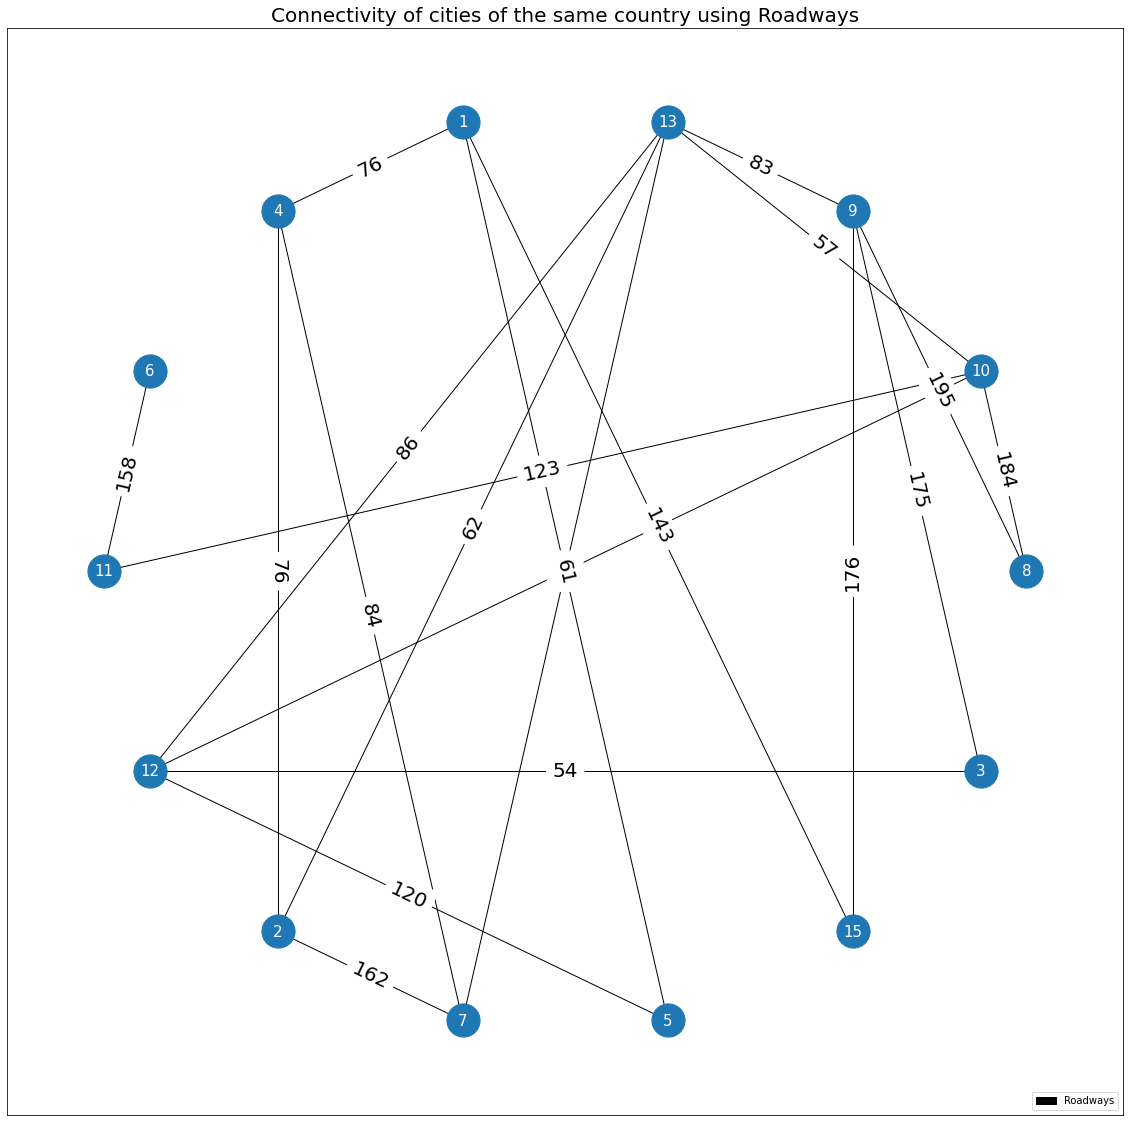

In [8]:
rg.displayRoute()

# Heuristic Functions - Time Dependent

In [37]:
# For the heuristics which are discrete values.
def f1(a : int,b : int,t : int):
    return a + b*t

In [75]:
# For the heuristics which are binary values. Hence, Sigmoid function used for the range to be between [0,1]
def f2(a : int,b : int,t : int):
    return round(1/(1-m.exp(-1*f(a,b,t))))

In [11]:
rg.graph.iloc[0]

Source           8
Destination     10
Distance       184
Name: 0, dtype: object

In [12]:
rg.graph.loc()

In [13]:
graph = dict()

for i in range(len(rg.graph)):
    if rg.graph.iloc[i]["Source"] not in graph:
        graph[rg.graph.iloc[i]["Source"]] = [rg.graph.iloc[i]["Destination"]]
    else:
        graph[rg.graph.iloc[i]["Source"]].append(rg.graph.iloc[i]["Destination"])
    
    if rg.graph.iloc[i]["Destination"] not in graph:
        graph[rg.graph.iloc[i]["Destination"]] = [rg.graph.iloc[i]["Source"]]
    else:
        graph[rg.graph.iloc[i]["Destination"]].append(rg.graph.iloc[i]["Source"])
    

In [14]:
graph

{8: [10, 9],
 10: [8, 12, 11, 13],
 9: [13, 8, 15, 3],
 13: [9, 2, 7, 10, 12],
 1: [4, 5, 15],
 4: [1, 2, 7],
 6: [11],
 11: [6, 10],
 12: [10, 5, 13, 3],
 2: [4, 7, 13],
 7: [4, 2, 13],
 5: [1, 12],
 15: [9, 1],
 3: [9, 12]}

# Adaptive A* Search

In [76]:
def Asearch(start,destination,g):
    # List to hold all the adjacent vertices of the current vertex.
    q = []
    # Stores the best heuristic value.
    best_heuristic = 0
    # List to store visited nodes to avoid a cycle in the graph.
    visited = [start]
    # Stores the best path or route.
    starts = [start]

    while starts[-1] != destination:
        
        if starts[-1] in g:
          q = g[starts[-1]]
        else:
          print("No route exists.")
          break
        # Keeps track of the heuristic values.
        scores = []
        # A list to store unvisited nodes.
        temp = []
        
        for j in q:
          if j not in visited or j not in starts:
            
            d = rg.graph.loc[((rg.graph["Source"] == starts[-1]) & (rg.graph["Destination"] == j)) | ((rg.graph["Destination"] == starts[-1]) & (rg.graph["Source"] == j))]["Distance"]
            
            score = d + f2(2,3,r.randint(1,100)) + f1(3,4,r.randint(1,20)) + f1(1,2,r.randint(1,15)) + f1(2,4,r.randint(1,10)) + f1(6,1,r.randint(1,13)) + f1(1,1,r.randint(1,12))
            
            scores.append(int(score))
            temp.append(j)
            

        if destination not in q:
         starts.append(temp[scores.index(max(scores))])
         best_heuristic += max(scores)
         visited = visited + q
        else:
         starts.append(destination)
    return starts,best_heuristic

In [77]:
results = Asearch(6,15,graph)

In [78]:
results

([6, 11, 10, 8, 9, 15], 1006)

The obtained path provides a Heuristic Value of 1006 . However, since heuristic values are time dependent everytime its executed a new value will be obtained.

# Visualising the results

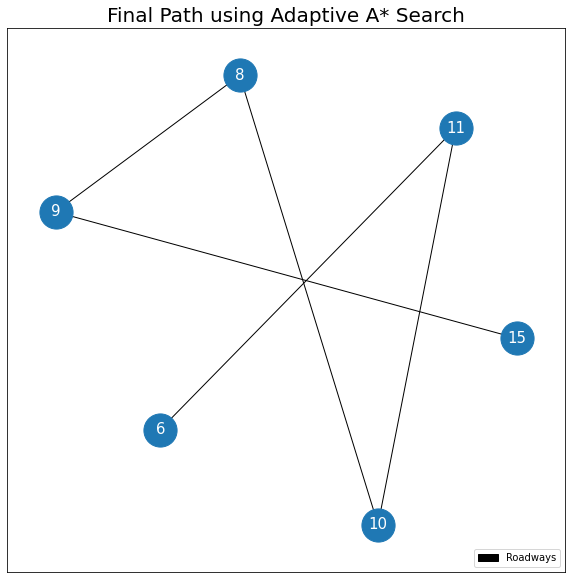

In [79]:
g = nx.Graph()
plt.figure(figsize=(10,10))
for i in range(len(results[0]) - 1):
          g.add_edge(results[0][i],results[0][i + 1])
pos = nx.spring_layout(g,k=5)
nx.draw_networkx_nodes(g, pos=pos,node_size=1100)
nx.draw_networkx_edges(g, pos=pos)
nx.draw_networkx_labels(g, pos, font_size=15,font_color='w')
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,'weight'),font_size=20)
plt.title("Final Path using Adaptive A* Search",font={"size":20})
black_patch = mpatches.Patch(color='black', label='Roadways')
plt.legend(handles=[black_patch],loc='lower right')
plt.show()

Hence, Adaptive A* Search was used to find the route with the highest number of facilities.